# Characterising stochastic processes

A stochastic process is described by probability distribution $P(y, t; y_0, t_0)$ at location $y$ and time $t$. A process becomes stationary if instead of dependence on particular $t_0$ it is determined only by separation $\tau$ in time.

### Power spectral density
Power spectral density is defined as:
$$S_Y(\omega) = \lim_{T\rightarrow \infty} \frac{1}{T}|\tilde{Y}_T(\omega)|^2,$$

where $\tilde{Y}_T(\omega)$ is Fourrier transform of $Y_T(t)$.

### Autocorrelation function
Briefly, the autocorrelation function describes how well we can predict value of next observation from the current one. It is defined as:

$$\varphi_Y(t) = \frac{1}{T} \int_{-T/2}^{T/2} d\tau Y_T(\tau)Y_T(\tau + t) = \Big\langle Y_T(\tau)Y_T(\tau + t) \Big\rangle.$$

**Wiener–Khinchin theorem** connects the PSD and autocorrelation function when it states that one is the (inverse)Fourier transform of the other as:

$$\varphi_Y(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} d\omega e^{-i\omega t}S_Y(\omega),$$
$$ S_Y(\omega)= \int_{-\infty}^{\infty} dt e^{i\omega t}\varphi_Y(t).$$

Evaluated at $0$ these give so called *Sum rules*:
$$\varphi_Y(0) = \frac{1}{2\pi} \int_{-\infty}^{\infty} d\omega S_Y(\omega),$$
$$ S_Y(0)= \int_{-\infty}^{\infty} dt \varphi_Y(t).$$

#### Periodic signal
As trivial example, consider PSD of single cosine wave: 

In [3]:
import numpy as np # import numpy library as np
import math # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt 
plt.style.use('ggplot') # use "ggplot" style for graphs
% matplotlib inline

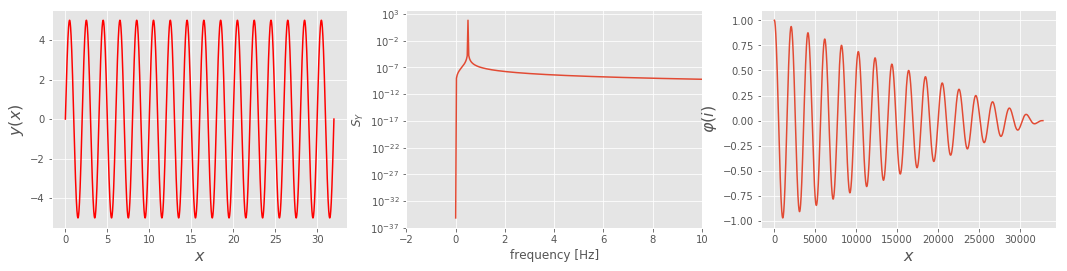

In [23]:
fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 4))
np.random.seed(0) # set random seed
do_corrupt = False

# generate signal
nsample = 2**15
A = 5
nu = 0.5
samplingf = 1024
x = np.linspace(0, nsample / samplingf, nsample)
y = A * np.sin( 2 * np.pi * nu * x)

# corupt signal
if do_corrupt:
    nse = np.random.rand(len(x))
    r = np.exp(-x/0.01)
    cnse = np.convolve(nse, r)
    cnse = cnse[:len(x)]
    y = y + (cnse - np.average(cnse))

# Plot signal
ax1.set_xlabel(r'$x$',fontsize=16) # set x-label
ax1.set_ylabel(r'$y(x)$',fontsize=16) # set y-label
ax1.plot(x,y, "r-")

# Compute PSD
from scipy.signal import welch, periodogram
freqs, Pxx = periodogram(y, samplingf, scaling = 'density', return_onesided = True)

# # Alternatively, can compute PSD manually
# from scipy.fftpack import fft, fftfreq
# ## https://dsp.stackexchange.com/questions/32187/what-should-be-the-correct-scaling-for-psd-calculation-using-tt-fft
# Pxx = (np.abs(fft(y)))**2 # get power spectrum, only real
# Pxx = 2*Pxx / (samplingf*len(y)) # apply scaling (rectangular window function)
# freqs = fftfreq(y.size, d = 1/samplingf)
# Pxx = Pxx[freqs>=0]
# freqs = freqs[freqs>=0]

# Plot PSD
ax2.semilogy(freqs, (1/(2*np.pi))*Pxx)
#ax2.set_ylim([0.1e-3, 1e2])
ax2.set_xlim([-2, 10])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel(r'$S_Y$')

## Compute autocorrelation
def auto_correlate(x, do_scale = False):
    cor = np.correlate(x, x, mode = "full")/len(x)
    if do_scale:
        cor = cor / np.var(x)
    return cor[len(x)-1:]

c = np.zeros(nsample)
ave = np.average(y)
c = auto_correlate(y - ave, True)

# Plot autocorrelation
ax3.plot(c)
#ax3.set_xlim(-500,8000)
ax3.set_xlabel(r'$x$',fontsize=16)
ax3.set_ylabel(r'$\varphi(i)$',fontsize=16)

plt.show()

The Spectral density peaks around the true frequency of the signal. The autocorrelation is periodic. 

#### White noise
Another trivial example is the PSD of white noise:


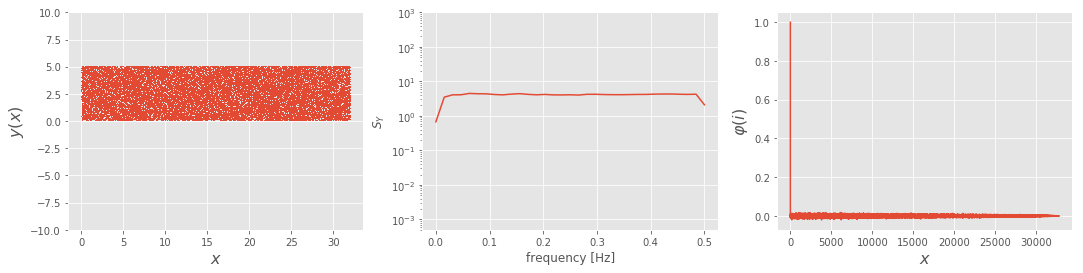

In [34]:
fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 4))
np.random.seed(0) # set random seed

# generate signal
nsample = 2**15
A = 5
#samplingf = 1024
y = A * np.random.rand(nsample)

# Plot signal
ax1.set_ylim([-2*A, 2*A])
ax1.set_xlabel(r'$x$',fontsize=16) # set x-label
ax1.set_ylabel(r'$y(x)$',fontsize=16) # set y-label
ax1.plot(x,y, ",")

# Compute PSD
from scipy.signal import welch, periodogram
#freqs, Pxx = periodogram(y, nfft = 32, scaling = 'density', return_onesided = True)
freqs, Pxx = welch(y, nperseg = 64, scaling = 'density', return_onesided = True)

# Plot PSD
ax2.semilogy(freqs, Pxx)
ax2.set_ylim([0.5e-3, 1e3])
#ax2.set_xlim([-2, 10])
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel(r'$S_Y$')

c = np.zeros(nsample)
ave = np.average(y)
c = auto_correlate(y - ave, True)

# Plot autocorrelation
ax3.plot(c)
#ax3.set_xlim(-500,8000)
ax3.set_xlabel(r'$x$',fontsize=16)
ax3.set_ylabel(r'$\varphi(i)$',fontsize=16)

plt.show()

PSD of white noise is flat. Consecutive observations are uncorrelated.

#### Questions:
* What is the proper choice for window size when computing FFT, PSD?
* How does one obtain proper magnitudes of PSD ($A^2$ in this case)
* Why does the autcorrelation function of periodic signal eventually decays?
* Why is not the PSD of white noise completely flat?